# Ensamble: Boosting

Podemos encontrar la documentacion en:  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, ensemble

from preprocessing import cargarDatasets
from preprocessing import prepararSetDeEntrenamiento
from preprocessing import prepararSetDeValidacion
from preprocessing import ingenieriaDeFeauturesArboles1
from preprocessing import ingenieriaDeFeauturesArboles2

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV

## Carga y preprocesamiento de datos
Cargamos los datasets y los preparamos para entrenar.

In [4]:
train_df,final_df = cargarDatasets()
train_df = prepararSetDeEntrenamiento(train_df)
final_df = prepararSetDeValidacion(final_df)

In [5]:
#CAMBIAR PREPROCESAMIENTO PARA XGBOOST
X,y,df,y_encoder = ingenieriaDeFeauturesArboles1(train_df)
X_reducido,y_reducido,df_reducido,y_encoder_reducido = ingenieriaDeFeauturesArboles2(train_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reducido, y_reducido, random_state=117, test_size=0.1, stratify=y_reducido)

## Hiperparametros
(estos me parecieron los mas importantes)
* loss function
* learning_rate
* n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
* criterion: valores posibles -> ‘friedman_mse’, ‘mse’, ‘mae’
* min_samples_split
* min_samples_leaf
* max_depth

In [6]:
#https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning
#https://www.quora.com/In-what-situations-do-neural-networks-outperform-gradient-boosting-and-random-forest-models-on-regular-numeric-and-categorical-data-non-image-or-text-data-if-any

#Como trabaja con arboles, los hiperparametros van a ser similares a los del arbol (tal vez podemos 
#justificar q por eso usamos los mismos preprocesamientos).
#creo que gridsearch no va a servir

In [7]:
XGboost = ensemble.GradientBoostingClassifier(random_state = 0, loss = 'exponential', criterion = 'mse', 
                                              min_samples_leaf = 20)

#entrenamos con los parametros.

In [8]:
XGboost.fit(X_train_r, y_train_r)

GradientBoostingClassifier(criterion='mse', loss='exponential',
                           min_samples_leaf=20, random_state=0)

In [9]:
y_pred = XGboost.predict(X_test_r)


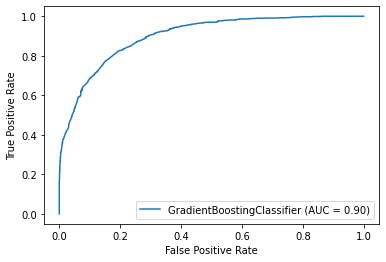

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, plot_roc_curve

plot_roc_curve(XGboost,X_test_r,y_test_r,response_method='predict_proba')
plt.show()